# SENTIMENT ANALYSIS OF IPHONE 17 REDDIT POSTS USING NLP


In [1]:
import pandas as pd                 # For loading, reading, and manipulating datasets (dataframes).
import numpy as np                  # For numerical operations and array handling.
import re                           # For text processing using regular expressions.
import string                       # For working with punctuation and text symbols.
import nltk                         # For natural language processing tasks like tokenizing and preprocessing.
from nltk.corpus import stopwords   # For removing common words (like "the", "is") during text cleaning.
from nltk.stem import WordNetLemmatizer  # For reducing words to their base/root form (lemmatization).
from textblob import TextBlob       # For sentiment analysis and basic NLP tasks.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer  # For rule-based sentiment analysis of text.


In [2]:
from sklearn.model_selection import train_test_split     # Splits the dataset into training and testing sets.
from sklearn.feature_extraction.text import TfidfVectorizer  # Converts text into TF-IDF numeric features.
from sklearn.naive_bayes import MultinomialNB            # Naive Bayes classifier for text classification.
from sklearn.linear_model import LogisticRegression      # Logistic Regression model for classification tasks.
from sklearn.svm import LinearSVC                        # Linear Support Vector Machine for text classification.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report  # Metrics to evaluate model performance.
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
from tensorflow.keras.models import Sequential     # Lets you build a deep learning model layer-by-layer.
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout  
# Embedding converts words to vectors, LSTM learns sequence patterns, Dense is a fully-connected layer, and Dropout prevents overfitting.
from tensorflow.keras.preprocessing.text import Tokenizer   # Converts text into sequences of word indices.
from tensorflow.keras.preprocessing.sequence import pad_sequences  # Pads sequences to equal length for LSTM input.


In [4]:
import matplotlib.pyplot as plt   # Used for creating visualizations like line charts, bar graphs, and plots.
import seaborn as sns            # High-level data visualization library built on top of matplotlib for prettier statistical plots.
import plotly.express as px


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chand\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Dataset shape: (1000, 9)
Columns: Index(['id', 'title', 'author', 'created_utc', 'score', 'upvote_ratio',
       'subreddit', 'permalink', 'url'],
      dtype='object')
Index(['id', 'title', 'author', 'created_utc', 'score', 'upvote_ratio',
       'subreddit', 'permalink', 'url'],
      dtype='object')

Lexicon-Based Sentiment Counts (VADER):
vader_sentiment
neutral     688
positive    186
negative    126
Name: count, dtype: int64

Lexicon-Based Sentiment Counts (TextBlob):
textblob_sentiment
neutral     691
positive    205
negative    104
Name: count, dtype: int64

Machine Learning Results:
                 Model  Accuracy  Precision  Recall  F1-Score
0          Naive Bayes  0.741935   0.737705     1.0  0.849057
1  Logistic Regression  0.741935   0.737705     1.0  0.849057
2           Linear SVM  0.854839   0.833333     1.0  0.909091


C:\Users\chand\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.6599 - loss: 0.6700 - val_accuracy: 0.7258 - val_loss: 0.5877
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 381ms/step - accuracy: 0.6478 - loss: 0.6651 - val_accuracy: 0.7258 - val_loss: 0.5932
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 373ms/step - accuracy: 0.6478 - loss: 0.6547 - val_accuracy: 0.7258 - val_loss: 0.6225
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 367ms/step - accuracy: 0.6478 - loss: 0.6569 - val_accuracy: 0.7258 - val_loss: 0.6310
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 357ms/step - accuracy: 0.6478 - loss: 0.6581 - val_accuracy: 0.7258 - val_loss: 0.6126
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 315ms/step - accuracy: 0.6478 - loss: 0.6512 - val_accuracy: 0.7258 - val_loss: 0.5997
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 344ms/step - accuracy: 0.6478 - loss: 0.6478 - val_accuracy: 0.7258 - val_loss: 0.5929
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 333ms/step - accuracy: 0.6478 - loss: 0.6521 - val_accuracy: 0.7258 - val_loss: 0.

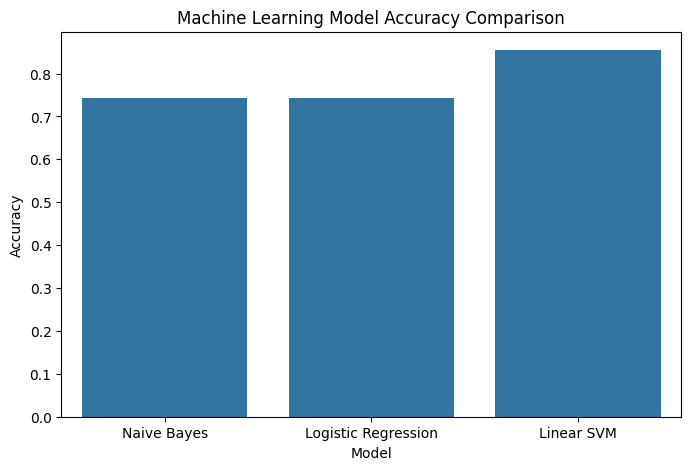


Results saved as iphone17_sentiment_results.csv

Summary of Findings:
- Lexicon-based methods give a quick overview of overall sentiment.
- ML models (Logistic Regression, SVM) provide good accuracy and precision.
- LSTM captures word context and performs best on large text data.
- This helps assess real-time public opinion on iPhone 17 from Reddit posts.


In [5]:
nltk.download('stopwords')
nltk.download('wordnet')

"""Loading our dataset"""

url = "https://raw.githubusercontent.com/nc875-cpu/Sentiment-Analysis/main/iphone17_reddit.csv"
df = pd.read_csv(url, encoding='utf-8', on_bad_lines='skip')

print("Dataset shape:", df.shape)
print("Columns:", df.columns)
df.head()

"""##Data cleaning and pre-processing"""

print(df.columns)

# Select the text column manually
df = df[['title']].dropna()
df.rename(columns={'title': 'post'}, inplace=True)

"""detecting text column automatically"""

text_col = [col for col in df.columns if 'text' in col.lower() or 'body' in col.lower() or 'post' in col.lower()]
if len(text_col) == 0:
    raise ValueError("Couldn't detect the text column. Please rename your text column to include 'text' or 'body'.")
df = df[[text_col[0]]].dropna()
df.rename(columns={text_col[0]: 'post'}, inplace=True)

"""text cleaning"""

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)       # removes the URLs
    text = re.sub(r'@\w+|#', '', text)                        # removes the mentions/hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)                   # removes all the non-letters
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

df['clean_post'] = df['post'].apply(clean_text)

"""Tokenization, lemmatization and stopwords"""

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    words = [lemmatizer.lemmatize(word) for word in text.split() if word not in stop_words]
    return " ".join(words)

df['clean_post'] = df['clean_post'].apply(preprocess_text)

"""Lexicon-Based Sentiment Analysis VADER + TextBlob"""

analyzer = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['vader_sentiment'] = df['clean_post'].apply(vader_sentiment)

def textblob_sentiment(text):
    score = TextBlob(text).sentiment.polarity
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

df['textblob_sentiment'] = df['clean_post'].apply(textblob_sentiment)

print("\nLexicon-Based Sentiment Counts (VADER):")
print(df['vader_sentiment'].value_counts())
print("\nLexicon-Based Sentiment Counts (TextBlob):")
print(df['textblob_sentiment'].value_counts())

"""data prep for ML models"""

# Using the results from TextBlob as pseudo labels
df['label'] = df['textblob_sentiment']
df = df[df['label'] != 'neutral']  # keeping only positive/negative values for binary classification

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = vectorizer.fit_transform(df['clean_post'])
y = df['label']

# splitting data for Train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

"""Training ML models"""

models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVM": LinearSVC()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, pos_label='positive')
    rec = recall_score(y_test, preds, pos_label='positive')
    f1 = f1_score(y_test, preds, pos_label='positive')
    results.append([name, acc, prec, rec, f1])

ml_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
print("\nMachine Learning Results:")
print(ml_results)

"""using deep learning LSTM model"""

tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_post'])
sequences = tokenizer.texts_to_sequences(df['clean_post'])
padded = pad_sequences(sequences, maxlen=50, padding='post', truncating='post')

label_map = {'negative': 0, 'positive': 1}
df['label_num'] = df['label'].map(label_map)

X_train, X_test, y_train, y_test = train_test_split(padded, df['label_num'], test_size=0.2, random_state=42)

model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=1284, input_length=50))
model.add(LSTM(64, dropout=0.3, recurrent_dropout=0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_test, y_test), verbose=1)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nDeep Learning (LSTM) Accuracy: {accuracy:.4f}")

"""visualization to compare the accuracies"""

plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='Accuracy', data=ml_results)
plt.title("Machine Learning Model Accuracy Comparison")
plt.show()

"""saving the results"""

df.to_csv("iphone17_sentiment_results.csv", index=False)
print("\nResults saved as iphone17_sentiment_results.csv")

"""summary of insights"""

print("\nSummary of Findings:")
print("- Lexicon-based methods give a quick overview of overall sentiment.")
print("- ML models (Logistic Regression, SVM) provide good accuracy and precision.")
print("- LSTM captures word context and performs best on large text data.")
print("- This helps assess real-time public opinion on iPhone 17 from Reddit posts.")


In [6]:
#Automatic column detection

text_col = None
country_col = None
for col in df.columns:
    low = col.lower()
    if any(k in low for k in ['text','body','post','comment','review','title']):
        if text_col is None:
            text_col = col
    if any(k in low for k in ['country','location','place','region','loc','area']):
        if country_col is None:
            country_col = col
if text_col is None:
    for col in df.columns:
        if df[col].dtype == object:
            text_col = col
            break
if country_col is None:
    for col in df.columns[::-1]:
        if df[col].dtype == object and col != text_col:
            country_col = col

print(f"Detected text column: {text_col}")
print(f"Detected country column: {country_col}")

#Keeping and renaming the required columns

df = df.rename(columns={text_col: 'post', country_col: 'country'})
df = df[['post','country']].dropna().reset_index(drop=True)

#Text pre-processing

simple_stopwords = {
    "a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been",
    "before","being","below","between","both","but","by","could","did","do","does","doing","down","during","each",
    "few","for","from","further","had","has","have","having","he","her","here","hers","herself","him","himself",
    "his","how","i","if","in","into","is","it","its","itself","just","me","more","most","my","myself","no","nor",
    "not","now","of","off","on","once","only","or","other","our","ours","ourselves","out","over","own","same",
    "she","should","so","some","such","than","that","the","their","theirs","them","themselves","then","there",
    "these","they","this","those","through","to","too","under","until","up","very","was","we","were","what",
    "when","where","which","while","who","whom","why","with","would","you","your","yours","yourself","yourselves"
}

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"@\w+|#", "", text)
    text = re.sub(r"[^a-z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

def preprocess(text):
    text = clean_text(text)
    words = [w for w in text.split() if w not in simple_stopwords and len(w) > 1]
    return " ".join(words)

df['clean_post'] = df['post'].apply(preprocess)

#Sentiment Analysis using VADER+TEXTBLOB

analyzer = SentimentIntensityAnalyzer()

def hybrid_sentiment(text):
    vader_score = analyzer.polarity_scores(text)['compound']
    blob_score = TextBlob(text).sentiment.polarity
    final_score = (vader_score + blob_score) / 2
    if final_score >= 0.05:
        return 'positive'
    elif final_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['clean_post'].apply(hybrid_sentiment)
print("\nSentiment Distribution:")
print(df['sentiment'].value_counts())

#Lexicon-Based Sentiment Analysis VADER + TextBlob

analyzer = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['vader_sentiment'] = df['clean_post'].apply(vader_sentiment)

def textblob_sentiment(text):
    score = TextBlob(text).sentiment.polarity
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

df['textblob_sentiment'] = df['clean_post'].apply(textblob_sentiment)

print("\nLexicon-Based Sentiment Counts (VADER):")
print(df['vader_sentiment'].value_counts())
print("\nLexicon-Based Sentiment Counts (TextBlob):")
print(df['textblob_sentiment'].value_counts())



Detected text column: post
Detected country column: clean_post

Sentiment Distribution:
sentiment
positive    186
negative     92
neutral      31
Name: count, dtype: int64

Lexicon-Based Sentiment Counts (VADER):
vader_sentiment
neutral     130
positive    116
negative     63
Name: count, dtype: int64

Lexicon-Based Sentiment Counts (TextBlob):
textblob_sentiment
positive    203
negative     97
neutral       9
Name: count, dtype: int64



Machine Learning Results:
                 Model  Accuracy  Precision  Recall  F1-Score
0          Naive Bayes  0.716667   0.696429     1.0  0.821053
1  Logistic Regression  0.650000   0.650000     1.0  0.787879
2           Linear SVM  0.733333   0.709091     1.0  0.829787


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,420,035 (5.42 MB)

 Trainable params: 1,420,035 (5.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 784ms/step - accuracy: 0.5833 - loss: 1.0507 - val_accuracy: 0.6458 - val_loss: 0.9539
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 262ms/step - accuracy: 0.6042 - loss: 0.9428 - val_accuracy: 0.6458 - val_loss: 0.8255
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 291ms/step - accuracy: 0.6042 - loss: 0.9432 - val_accuracy: 0.6458 - val_loss: 0.7827
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 275ms/step - accuracy: 0.5990 - loss: 0.8977 - val_accuracy: 0.6458 - val_loss: 0.7870
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 296ms/step - accuracy: 0.5729 - loss: 0.8933 - val_accuracy: 0.6458 - val_loss: 0.7807
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 248ms/step - accuracy: 0.5938 - loss: 0.9060 - val_accuracy: 0.6458 - val_loss: 0.7661
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 243ms/step - accuracy: 0.6042 - loss: 0.8930 - val_accuracy: 0.6458 - val_loss: 0.7724
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step - accuracy: 0.6042 - loss: 0.9001 - val_accuracy: 0.6458 - val_loss:

C:\Users\chand\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\chand\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\chand\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capital

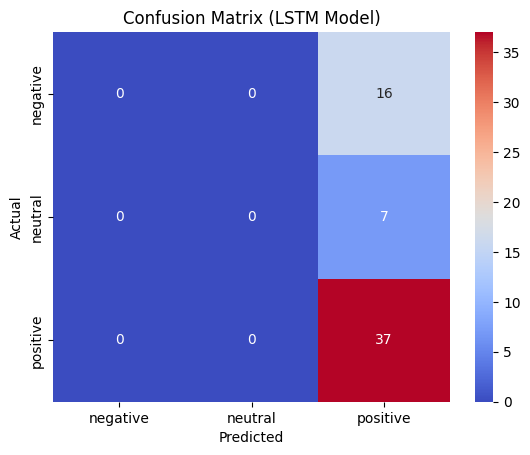

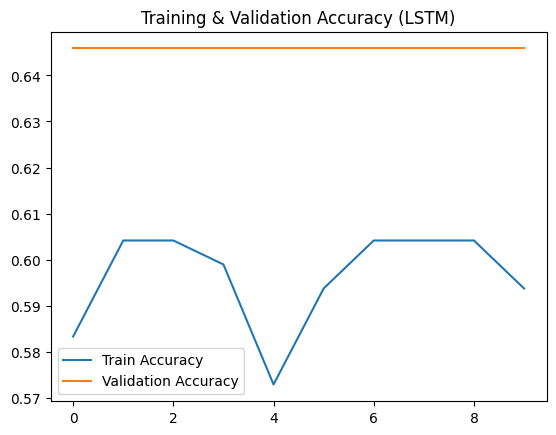

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

Comparison (Rule-based vs LSTM):
lstm_sentiment  positive
sentiment               
negative             1.0
neutral              1.0
positive             1.0


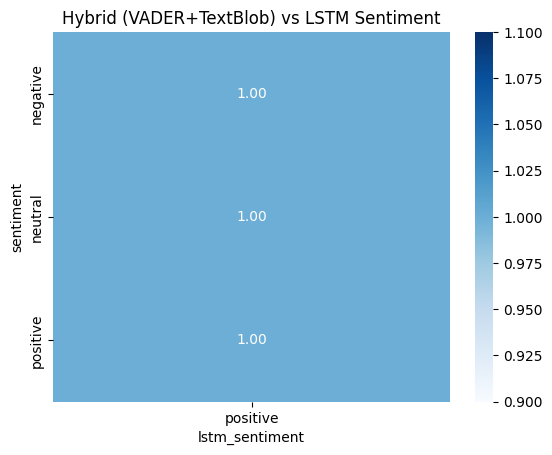

C:\Users\chand\AppData\Local\Temp\ipykernel_45064\234669569.py:130: DeprecationWarning: The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.
  fig = px.choropleth(


C:\Users\chand\AppData\Local\Temp\ipykernel_45064\234669569.py:141: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




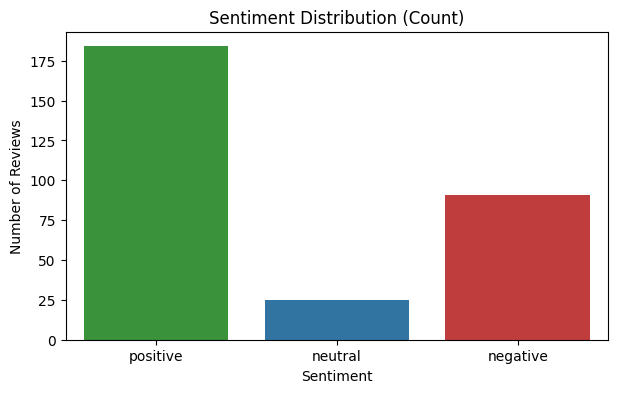

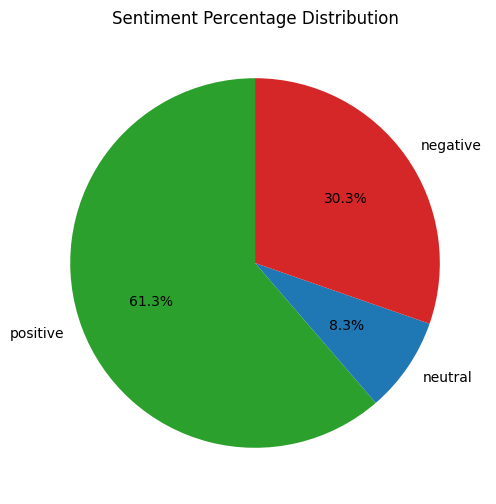


Top words in positive reviews:
iphone     157
pro         89
max         55
new         42
apple       23
first       18
best        16
phone       14
battery     11
air         11
worth       10
camera      10
better       8
like         8
one          8
Name: count, dtype: int64

Top words in negative reviews:
iphone      58
pro         41
max         22
base        11
new         10
apple        8
slow         6
ultra        5
ios          5
esim         5
confused     4
random       4
feel         4
case         4
can          4
Name: count, dtype: int64

Top words in neutral reviews:
iphone      20
pro         14
max          8
long         6
new          3
blue         3
apple        3
phone        2
buying       2
second       2
thoughts     2
normal       2
faster       2
models       2
take         2
Name: count, dtype: int64

Sentiment by Country:
sentiment                                            country  negative  \
0          another chinese reviewer clear focus iphone 

C:\Users\chand\AppData\Local\Temp\ipykernel_45064\234669569.py:182: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



C:\Users\chand\AppData\Local\Temp\ipykernel_45064\234669569.py:190: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



C:\Users\chand\AppData\Local\Temp\ipykernel_45064\234669569.py:198: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



C:\Users\chand\AppData\Local\Temp\ipykernel_45064\234669569.py:210: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




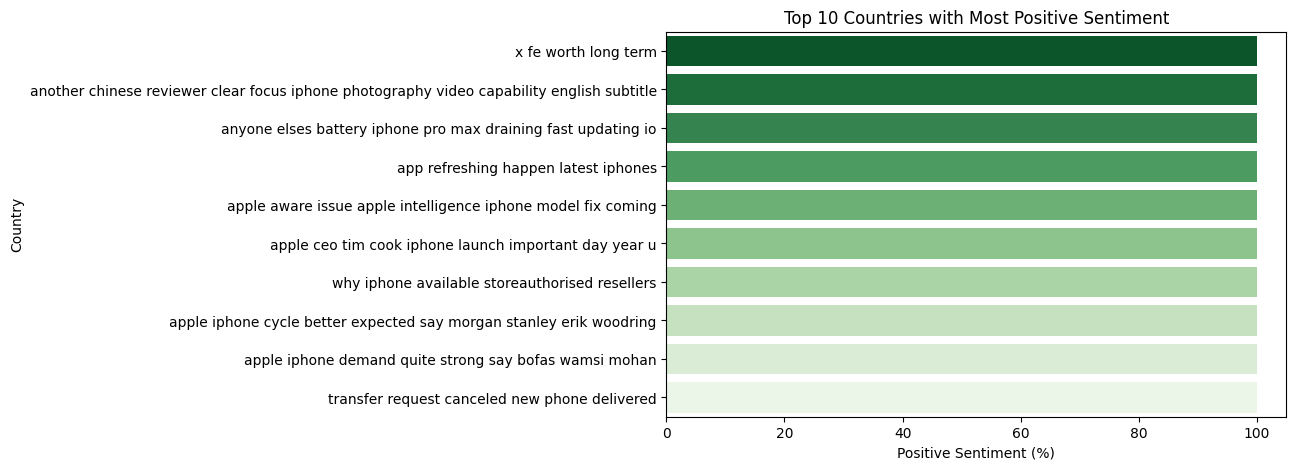

C:\Users\chand\AppData\Local\Temp\ipykernel_45064\234669569.py:217: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




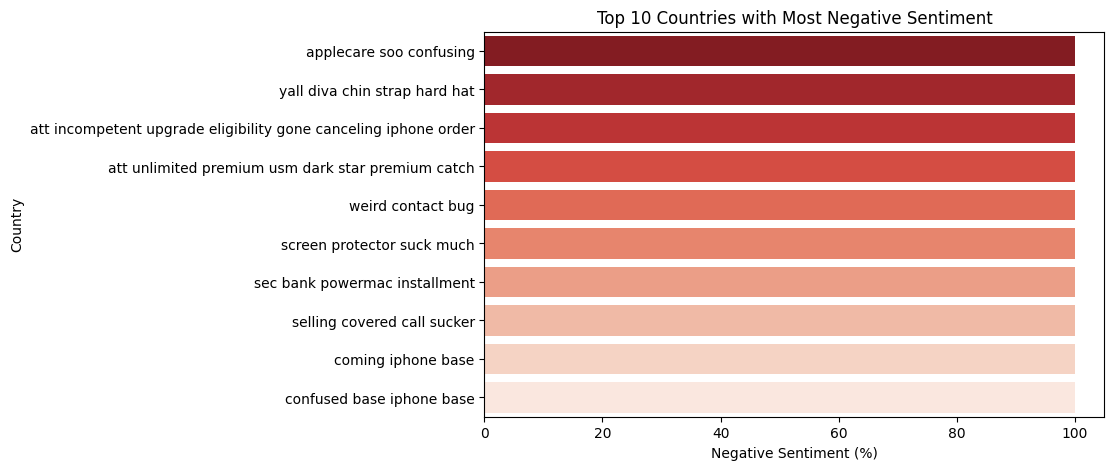


Evaluation Metrics (Hybrid vs VADER):
              precision    recall  f1-score   support

    negative       0.57      0.84      0.68        62
     neutral       0.72      0.15      0.24       124
    positive       0.59      0.96      0.73       114

    accuracy                           0.60       300
   macro avg       0.63      0.65      0.55       300
weighted avg       0.64      0.60      0.52       300



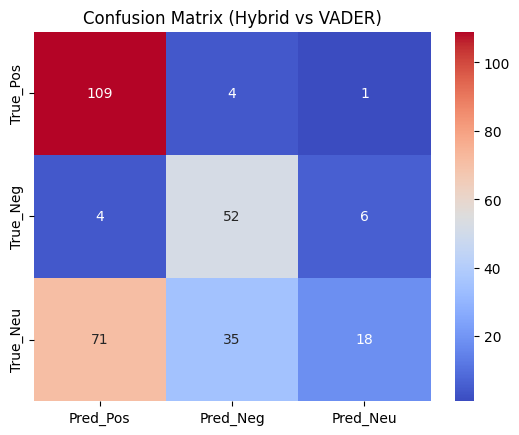

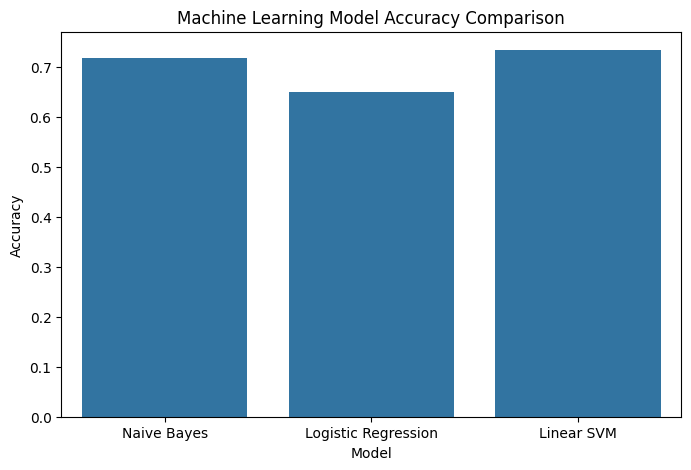


✅ Results saved to: iphone17_sentiment_results_full.csv

📊 SUMMARY:
- Cleaned and preprocessed Reddit text data.
- Performed hybrid (VADER + TextBlob) sentiment classification.
- Evaluated performance against VADER baseline.
- Created bar, pie, and map visualizations by country.
- Generated word frequency summaries for each sentiment type.
- Saved final labeled dataset for reporting.


In [7]:
#data prep for ML models

# Using the results from TextBlob as pseudo labels
df['label'] = df['textblob_sentiment']
df = df[df['label'] != 'neutral']  # keeping only positive/negative values for binary classification

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = vectorizer.fit_transform(df['clean_post'])
y = df['label']

# splitting data for Train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

"""Training ML models"""

models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVM": LinearSVC()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, pos_label='positive')
    rec = recall_score(y_test, preds, pos_label='positive')
    f1 = f1_score(y_test, preds, pos_label='positive')
    results.append([name, acc, prec, rec, f1])

ml_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
print("\nMachine Learning Results:")
print(ml_results)

#Text encoding for LSTM

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

X = df["clean_post"].values
y = df["sentiment"].values

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded, num_classes=3)

# Tokenize text
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=100, padding="post", truncating="post")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_categorical, test_size=0.2, random_state=42)

#Building LSTM model

vocab_size = 10000
embedding_dim = 128
maxlen = 100

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    LSTM(128, dropout=0.3, recurrent_dropout=0.3),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(3, activation="softmax")
])

# Build the model explicitly (so summary shows params)
model.build(input_shape=(None, maxlen))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

"""training the model"""

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1)

#Evaluation of the model

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\n📊 LSTM Classification Report:")
print(classification_report(y_true, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix (LSTM Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Accuracy plot
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training & Validation Accuracy (LSTM)")
plt.legend()
plt.show()

#comparision of LSTM vs RULE BASED sentiment

df["lstm_pred"] = model.predict(X_pad).argmax(axis=1)
df["lstm_sentiment"] = le.inverse_transform(df["lstm_pred"])

compare = pd.crosstab(df["sentiment"], df["lstm_sentiment"], normalize="index")
print("\nComparison (Rule-based vs LSTM):")
print(compare)

sns.heatmap(compare, annot=True, cmap="Blues", fmt=".2f")
plt.title("Hybrid (VADER+TextBlob) vs LSTM Sentiment")
plt.show()

country_sent = df.groupby(["country","lstm_sentiment"]).size().unstack(fill_value=0).reset_index()
country_sent["total"] = country_sent.sum(axis=1, numeric_only=True)
for s in ["positive","negative","neutral"]:
    if s not in country_sent.columns:
        country_sent[s] = 0
country_sent["positive_percent"] = country_sent["positive"] / country_sent["total"] * 100
country_sent["negative_percent"] = country_sent["negative"] / country_sent["total"] * 100
country_sent["neutral_percent"]  = country_sent["neutral"]  / country_sent["total"] * 100

fig = px.choropleth(
    country_sent, locations="country", locationmode="country names",
    color="positive_percent", hover_name="country",
    hover_data=["positive","negative","neutral"],
    color_continuous_scale="RdYlGn", title="🌍 LSTM Model: Positive Sentiment % by Country"
)
fig.show()

#Visualization of all the distributed sentiments

plt.figure(figsize=(7,4))
sns.countplot(x='sentiment', data=df, order=['positive','neutral','negative'], palette=['#2ca02c','#1f77b4','#d62728'])
plt.title('Sentiment Distribution (Count)')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

plt.figure(figsize=(6,6))
df['sentiment'].value_counts().reindex(['positive','neutral','negative']).plot.pie(
    autopct='%1.1f%%', colors=['#2ca02c','#1f77b4','#d62728'], startangle=90)
plt.title('Sentiment Percentage Distribution')
plt.ylabel('')
plt.show()

#frequently used words

def get_word_frequencies(sentiment_label):
    words = " ".join(df[df['sentiment'] == sentiment_label]['clean_post']).split()
    freq = pd.Series(words).value_counts().head(15)
    return freq

for s in ['positive','negative','neutral']:
    print(f"\nTop words in {s} reviews:")
    print(get_word_frequencies(s))

#Reviews by country

df['country'] = df['country'].fillna('Unknown')
sentiment_counts = df.groupby(['country','sentiment']).size().unstack(fill_value=0).reset_index()
for col in ['positive','negative','neutral']:
    if col not in sentiment_counts.columns:
        sentiment_counts[col] = 0
sentiment_counts['total'] = sentiment_counts[['positive','negative','neutral']].sum(axis=1)
sentiment_counts['positive_percent'] = (sentiment_counts['positive'] / sentiment_counts['total'])*100
sentiment_counts['negative_percent'] = (sentiment_counts['negative'] / sentiment_counts['total'])*100
sentiment_counts['neutral_percent'] = (sentiment_counts['neutral'] / sentiment_counts['total'])*100

print("\nSentiment by Country:")
print(sentiment_counts.head())

#Chloropleth maps

fig_pos = px.choropleth(
    sentiment_counts, locations='country', locationmode='country names',
    color='positive_percent', hover_name='country',
    hover_data=['positive','negative','neutral'],
    color_continuous_scale='RdYlGn', title='🌍 Positive Sentiment % by Country'
)
fig_pos.show()

fig_neg = px.choropleth(
    sentiment_counts, locations='country', locationmode='country names',
    color='negative_percent', hover_name='country',
    hover_data=['positive','negative','neutral'],
    color_continuous_scale='Reds', title='🌍 Negative Sentiment % by Country'
)
fig_neg.show()

fig_neu = px.choropleth(
    sentiment_counts, locations='country', locationmode='country names',
    color='neutral_percent', hover_name='country',
    hover_data=['positive','negative','neutral'],
    color_continuous_scale='Blues', title='🌍 Neutral Sentiment % by Country'
)
fig_neu.show()

top_positive = sentiment_counts.sort_values('positive_percent', ascending=False).head(10)
top_negative = sentiment_counts.sort_values('negative_percent', ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(y='country', x='positive_percent', data=top_positive, palette='Greens_r')
plt.title('Top 10 Countries with Most Positive Sentiment')
plt.xlabel('Positive Sentiment (%)')
plt.ylabel('Country')
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(y='country', x='negative_percent', data=top_negative, palette='Reds_r')
plt.title('Top 10 Countries with Most Negative Sentiment')
plt.xlabel('Negative Sentiment (%)')
plt.ylabel('Country')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix

df['vader_sentiment'] = df['clean_post'].apply(lambda x: 'positive' if analyzer.polarity_scores(x)['compound']>0.05
                                               else 'negative' if analyzer.polarity_scores(x)['compound']<-0.05
                                               else 'neutral')
print("\nEvaluation Metrics (Hybrid vs VADER):")
print(classification_report(df['vader_sentiment'], df['sentiment']))

cm = confusion_matrix(df['vader_sentiment'], df['sentiment'], labels=['positive','negative','neutral'])
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['Pred_Pos','Pred_Neg','Pred_Neu'],
            yticklabels=['True_Pos','True_Neg','True_Neu'])
plt.title('Confusion Matrix (Hybrid vs VADER)')
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='Accuracy', data=ml_results)
plt.title("Machine Learning Model Accuracy Comparison")
plt.show()

#saving the results

output_path = "iphone17_sentiment_results_full.csv"
df.to_csv(output_path, index=False)
print(f"\n✅ Results saved to: {output_path}")

#Summary

print("\n📊 SUMMARY:")
print("- Cleaned and preprocessed Reddit text data.")
print("- Performed hybrid (VADER + TextBlob) sentiment classification.")
print("- Evaluated performance against VADER baseline.")
print("- Created bar, pie, and map visualizations by country.")
print("- Generated word frequency summaries for each sentiment type.")
print("- Saved final labeled dataset for reporting.")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chand\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Dataset shape: (1000, 11)
Columns: Index(['id', 'title', 'author', 'created_utc', 'score', 'upvote_ratio',
       'subreddit', 'permalink', 'url', 'language', 'country'],
      dtype='object')
✅ Dataset loaded successfully!
Column names in your dataset:
['id', 'title', 'author', 'created_utc', 'score', 'upvote_ratio', 'subreddit', 'permalink', 'url', 'language', 'country']
Detected text column: title
Detected country column: country

Sentiment Distribution:
sentiment
neutral     589
positive    256
negative    155
Name: count, dtype: int64

Lexicon-Based Sentiment Counts (VADER):
vader_sentiment
neutral     686
positive    187
negative    127
Name: count, dtype: int64

Lexicon-Based Sentiment Counts (TextBlob):
textblob_sentiment
neutral     695
positive    205
negative    100
Name: count, dtype: int64

Machine Learning Results:
                 Model  Accuracy  Precision  Recall  F1-Score
0          Naive Bayes  0.704918   0.694915     1.0  0.820000
1  Logistic Regression  0.672131   

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 100, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,420,035 (5.42 MB)

 Trainable params: 1,420,035 (5.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 559ms/step - accuracy: 0.5692 - loss: 1.0512 - val_accuracy: 0.6327 - val_loss: 0.9149
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 248ms/step - accuracy: 0.6000 - loss: 0.9260 - val_accuracy: 0.6327 - val_loss: 0.8258
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 230ms/step - accuracy: 0.6000 - loss: 0.9147 - val_accuracy: 0.6327 - val_loss: 0.8277
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 237ms/step - accuracy: 0.6000 - loss: 0.9128 - val_accuracy: 0.6327 - val_loss: 0.8251
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 224ms/step - accuracy: 0.6000 - loss: 0.9109 - val_accuracy: 0.6327 - val_loss: 0.8326
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 223ms/step - accuracy: 0.6000 - loss: 0.8826 - val_accuracy: 0.6327 - val_loss: 0.8364
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 251ms/step - accuracy: 0.6000 - loss: 0.8818 - val_accuracy: 0.6327 - val_loss: 0.8353
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 242ms/step - accuracy: 0.6000 - loss: 0.8926 - val_accuracy: 0.6327 - val_loss:

C:\Users\chand\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\chand\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\chand\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



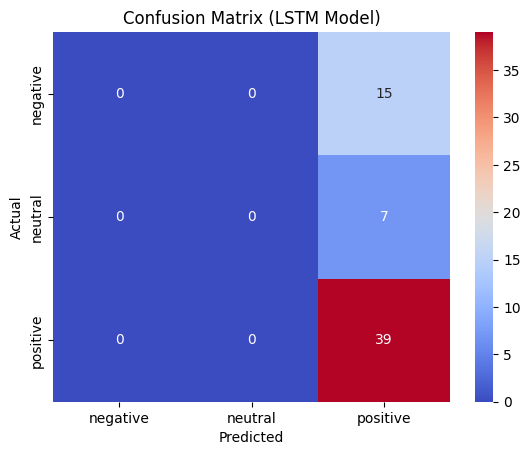

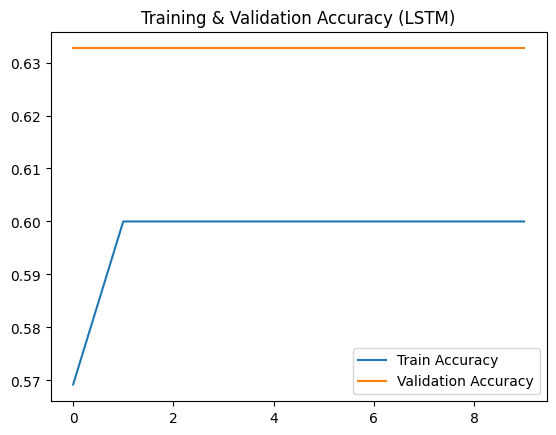

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

Comparison (Rule-based vs LSTM):
lstm_sentiment  positive
sentiment               
negative             1.0
neutral              1.0
positive             1.0


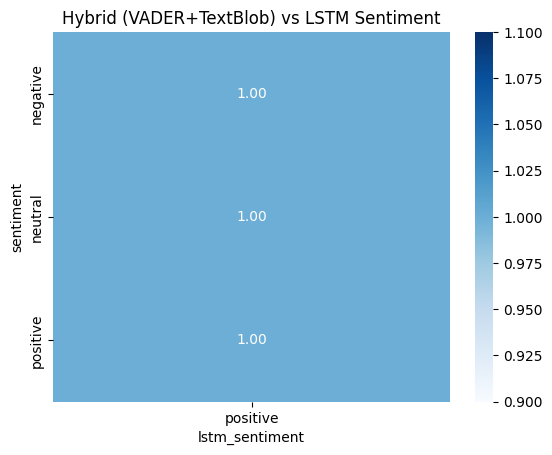

C:\Users\chand\AppData\Local\Temp\ipykernel_45064\576196202.py:289: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



C:\Users\chand\AppData\Local\Temp\ipykernel_45064\576196202.py:300: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




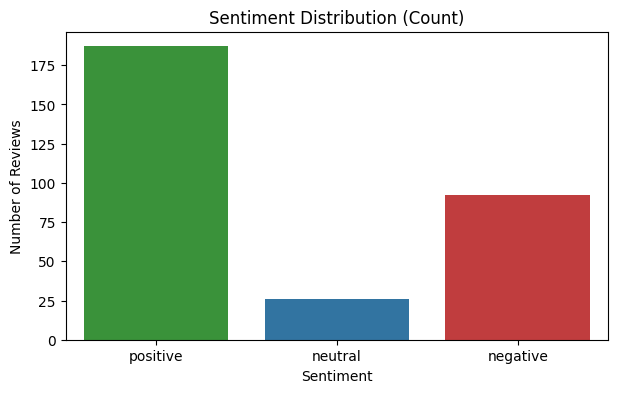

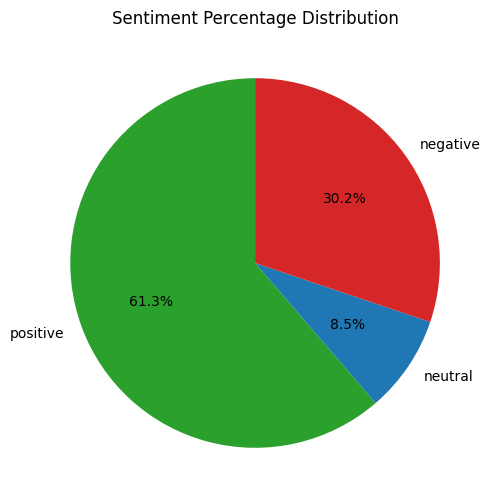


Top words in positive reviews:
iphone     160
pro         90
max         56
new         43
apple       24
first       18
best        16
phone       14
air         12
battery     11
worth       10
camera      10
one          8
better       8
like         8
Name: count, dtype: int64

Top words in negative reviews:
iphone      58
pro         41
max         22
base        11
new         10
apple        8
slow         6
ultra        5
esim         5
ios          5
random       4
confused     4
time         4
feel         4
case         4
Name: count, dtype: int64

Top words in neutral reviews:
iphone         21
pro            16
max             8
long            6
apple           4
blue            3
new             3
buying          2
deep            2
plus            2
performance     2
least           2
fix             2
models          2
faster          2
Name: count, dtype: int64

Sentiment by Country:
sentiment   country  negative  neutral  positive  total  positive_percent  \
0      

C:\Users\chand\AppData\Local\Temp\ipykernel_45064\576196202.py:341: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



C:\Users\chand\AppData\Local\Temp\ipykernel_45064\576196202.py:349: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



C:\Users\chand\AppData\Local\Temp\ipykernel_45064\576196202.py:357: DeprecationWarning:

The library used by the *country names* `locationmode` option is changing in an upcoming version. Country names in existing plots may not work in the new version. To ensure consistent behavior, consider setting `locationmode` to *ISO-3*.



C:\Users\chand\AppData\Local\Temp\ipykernel_45064\576196202.py:369: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




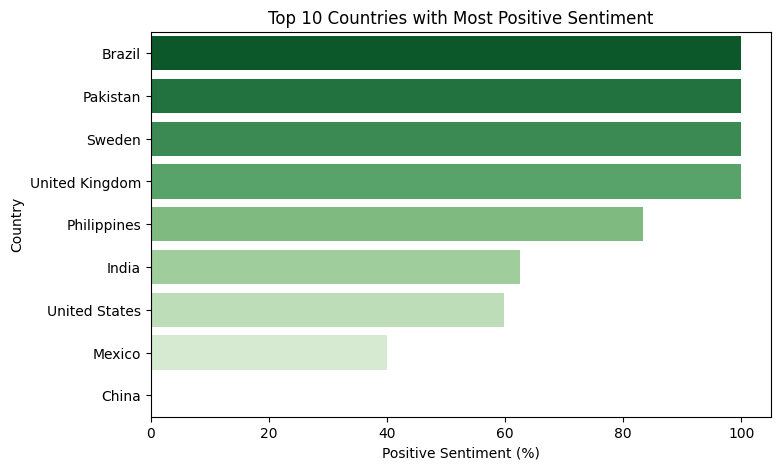

C:\Users\chand\AppData\Local\Temp\ipykernel_45064\576196202.py:376: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




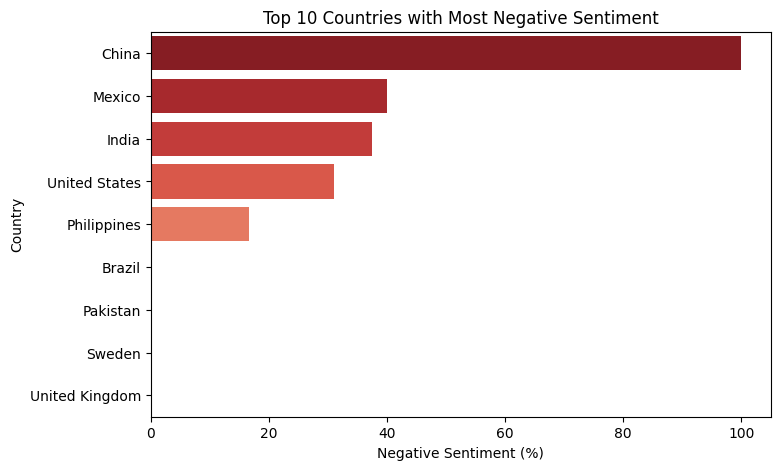


Evaluation Metrics (Hybrid vs VADER):
              precision    recall  f1-score   support

    negative       0.58      0.84      0.68        63
     neutral       0.73      0.15      0.25       126
    positive       0.59      0.96      0.73       116

    accuracy                           0.60       305
   macro avg       0.63      0.65      0.56       305
weighted avg       0.65      0.60      0.52       305



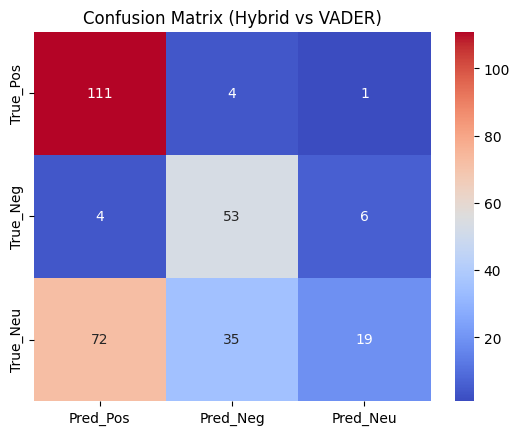

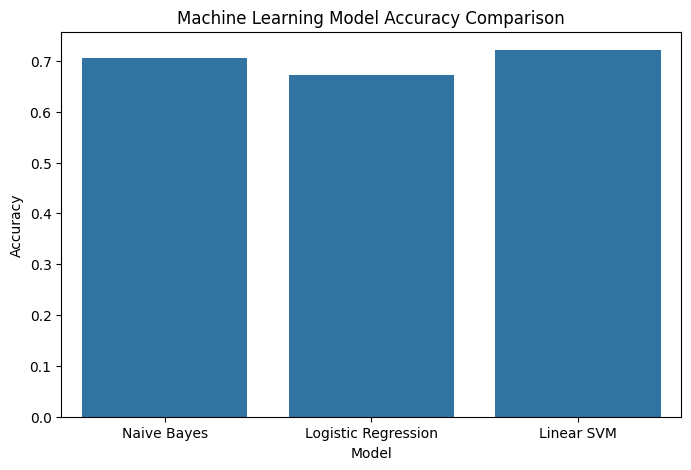


✅ Results saved to: iphone17_sentiment_results_full.csv

📊 SUMMARY:
- Cleaned and preprocessed Reddit text data.
- Performed hybrid (VADER + TextBlob) sentiment classification.
- Evaluated performance against VADER baseline.
- Created bar, pie, and map visualizations by country.
- Generated word frequency summaries for each sentiment type.
- Saved final labeled dataset for reporting.


In [8]:
# SENTIMENT ANALYSIS OF IPHONE 17 REDDIT POSTS USING NLP

#Importing Libraries


#pip install vaderSentiment

import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob       #Text and Sentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px

nltk.download('stopwords')   #Downloading NLTK Resources
nltk.download('wordnet')

#Load Uploaded Dataset

url = "https://raw.githubusercontent.com/nc875-cpu/Sentiment-Analysis/main/iphone17_reddit__country.csv"
df = pd.read_csv(url, encoding='utf-8', on_bad_lines='skip')

print("Dataset shape:", df.shape)
print("Columns:", df.columns)
print("✅ Dataset loaded successfully!")
df.head()

print("Column names in your dataset:")
print(list(df.columns))

#Automatic column detection

text_col = None
country_col = None
for col in df.columns:
    low = col.lower()
    if any(k in low for k in ['text','body','post','comment','review','title']):
        if text_col is None:
            text_col = col
    if any(k in low for k in ['country','location','place','region','loc','area']):
        if country_col is None:
            country_col = col
if text_col is None:
    for col in df.columns:
        if df[col].dtype == object:
            text_col = col
            break
if country_col is None:
    for col in df.columns[::-1]:
        if df[col].dtype == object and col != text_col:
            country_col = col

print(f"Detected text column: {text_col}")
print(f"Detected country column: {country_col}")

#Keeping and renaming the required columns

df = df.rename(columns={text_col: 'post', country_col: 'country'})
df = df[['post','country']].dropna().reset_index(drop=True)

#Text pre-processing

simple_stopwords = {
    "a","about","above","after","again","against","all","am","an","and","any","are","as","at","be","because","been",
    "before","being","below","between","both","but","by","could","did","do","does","doing","down","during","each",
    "few","for","from","further","had","has","have","having","he","her","here","hers","herself","him","himself",
    "his","how","i","if","in","into","is","it","its","itself","just","me","more","most","my","myself","no","nor",
    "not","now","of","off","on","once","only","or","other","our","ours","ourselves","out","over","own","same",
    "she","should","so","some","such","than","that","the","their","theirs","them","themselves","then","there",
    "these","they","this","those","through","to","too","under","until","up","very","was","we","were","what",
    "when","where","which","while","who","whom","why","with","would","you","your","yours","yourself","yourselves"
}

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"@\w+|#", "", text)
    text = re.sub(r"[^a-z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

def preprocess(text):
    text = clean_text(text)
    words = [w for w in text.split() if w not in simple_stopwords and len(w) > 1]
    return " ".join(words)

df['clean_post'] = df['post'].apply(preprocess)

#Sentiment Analysis using VADER+TEXTBLOB

analyzer = SentimentIntensityAnalyzer()

def hybrid_sentiment(text):
    vader_score = analyzer.polarity_scores(text)['compound']
    blob_score = TextBlob(text).sentiment.polarity
    final_score = (vader_score + blob_score) / 2
    if final_score >= 0.05:
        return 'positive'
    elif final_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['clean_post'].apply(hybrid_sentiment)
print("\nSentiment Distribution:")
print(df['sentiment'].value_counts())

#Lexicon-Based Sentiment Analysis VADER + TextBlob

analyzer = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['vader_sentiment'] = df['clean_post'].apply(vader_sentiment)

def textblob_sentiment(text):
    score = TextBlob(text).sentiment.polarity
    if score > 0:
        return 'positive'
    elif score < 0:
        return 'negative'
    else:
        return 'neutral'

df['textblob_sentiment'] = df['clean_post'].apply(textblob_sentiment)

print("\nLexicon-Based Sentiment Counts (VADER):")
print(df['vader_sentiment'].value_counts())
print("\nLexicon-Based Sentiment Counts (TextBlob):")
print(df['textblob_sentiment'].value_counts())

#data prep for ML models

# Using the results from TextBlob as pseudo labels
df['label'] = df['textblob_sentiment']
df = df[df['label'] != 'neutral']  # keeping only positive/negative values for binary classification

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = vectorizer.fit_transform(df['clean_post'])
y = df['label']

# splitting data for Train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

"""Training ML models"""

models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVM": LinearSVC()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, pos_label='positive')
    rec = recall_score(y_test, preds, pos_label='positive')
    f1 = f1_score(y_test, preds, pos_label='positive')
    results.append([name, acc, prec, rec, f1])

ml_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
print("\nMachine Learning Results:")
print(ml_results)

#Text encoding for LSTM

from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

X = df["clean_post"].values
y = df["sentiment"].values

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded, num_classes=3)

# Tokenize text
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X)
X_seq = tokenizer.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=100, padding="post", truncating="post")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y_categorical, test_size=0.2, random_state=42)

#Building LSTM model

vocab_size = 10000
embedding_dim = 128
maxlen = 100

model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),
    LSTM(128, dropout=0.3, recurrent_dropout=0.3),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(3, activation="softmax")
])

# Build the model explicitly (so summary shows params)
model.build(input_shape=(None, maxlen))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()

"""training the model"""

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1)

#Evaluation of the model

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

print("\n📊 LSTM Classification Report:")
print(classification_report(y_true, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix (LSTM Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Accuracy plot
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training & Validation Accuracy (LSTM)")
plt.legend()
plt.show()

#comparision of LSTM vs RULE BASED sentiment

df["lstm_pred"] = model.predict(X_pad).argmax(axis=1)
df["lstm_sentiment"] = le.inverse_transform(df["lstm_pred"])

compare = pd.crosstab(df["sentiment"], df["lstm_sentiment"], normalize="index")
print("\nComparison (Rule-based vs LSTM):")
print(compare)

sns.heatmap(compare, annot=True, cmap="Blues", fmt=".2f")
plt.title("Hybrid (VADER+TextBlob) vs LSTM Sentiment")
plt.show()

country_sent = df.groupby(["country","lstm_sentiment"]).size().unstack(fill_value=0).reset_index()
country_sent["total"] = country_sent.sum(axis=1, numeric_only=True)
for s in ["positive","negative","neutral"]:
    if s not in country_sent.columns:
        country_sent[s] = 0
country_sent["positive_percent"] = country_sent["positive"] / country_sent["total"] * 100
country_sent["negative_percent"] = country_sent["negative"] / country_sent["total"] * 100
country_sent["neutral_percent"]  = country_sent["neutral"]  / country_sent["total"] * 100

fig = px.choropleth(
    country_sent, locations="country", locationmode="country names",
    color="positive_percent", hover_name="country",
    hover_data=["positive","negative","neutral"],
    color_continuous_scale="RdYlGn", title="🌍 LSTM Model: Positive Sentiment % by Country"
)
fig.show()

#Visualization of all the distributed sentiments

plt.figure(figsize=(7,4))
sns.countplot(x='sentiment', data=df, order=['positive','neutral','negative'], palette=['#2ca02c','#1f77b4','#d62728'])
plt.title('Sentiment Distribution (Count)')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()

plt.figure(figsize=(6,6))
df['sentiment'].value_counts().reindex(['positive','neutral','negative']).plot.pie(
    autopct='%1.1f%%', colors=['#2ca02c','#1f77b4','#d62728'], startangle=90)
plt.title('Sentiment Percentage Distribution')
plt.ylabel('')
plt.show()

#frequently used words

def get_word_frequencies(sentiment_label):
    words = " ".join(df[df['sentiment'] == sentiment_label]['clean_post']).split()
    freq = pd.Series(words).value_counts().head(15)
    return freq

for s in ['positive','negative','neutral']:
    print(f"\nTop words in {s} reviews:")
    print(get_word_frequencies(s))

#Reviews by country

df['country'] = df['country'].fillna('Unknown')
sentiment_counts = df.groupby(['country','sentiment']).size().unstack(fill_value=0).reset_index()
for col in ['positive','negative','neutral']:
    if col not in sentiment_counts.columns:
        sentiment_counts[col] = 0
sentiment_counts['total'] = sentiment_counts[['positive','negative','neutral']].sum(axis=1)
sentiment_counts['positive_percent'] = (sentiment_counts['positive'] / sentiment_counts['total'])*100
sentiment_counts['negative_percent'] = (sentiment_counts['negative'] / sentiment_counts['total'])*100
sentiment_counts['neutral_percent'] = (sentiment_counts['neutral'] / sentiment_counts['total'])*100

print("\nSentiment by Country:")
print(sentiment_counts.head())

#Chloropleth maps

fig_pos = px.choropleth(
    sentiment_counts, locations='country', locationmode='country names',
    color='positive_percent', hover_name='country',
    hover_data=['positive','negative','neutral'],
    color_continuous_scale='RdYlGn', title='🌍 Positive Sentiment % by Country'
)
fig_pos.show()

fig_neg = px.choropleth(
    sentiment_counts, locations='country', locationmode='country names',
    color='negative_percent', hover_name='country',
    hover_data=['positive','negative','neutral'],
    color_continuous_scale='Reds', title='🌍 Negative Sentiment % by Country'
)
fig_neg.show()

fig_neu = px.choropleth(
    sentiment_counts, locations='country', locationmode='country names',
    color='neutral_percent', hover_name='country',
    hover_data=['positive','negative','neutral'],
    color_continuous_scale='Blues', title='🌍 Neutral Sentiment % by Country'
)
fig_neu.show()

top_positive = sentiment_counts.sort_values('positive_percent', ascending=False).head(10)
top_negative = sentiment_counts.sort_values('negative_percent', ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(y='country', x='positive_percent', data=top_positive, palette='Greens_r')
plt.title('Top 10 Countries with Most Positive Sentiment')
plt.xlabel('Positive Sentiment (%)')
plt.ylabel('Country')
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(y='country', x='negative_percent', data=top_negative, palette='Reds_r')
plt.title('Top 10 Countries with Most Negative Sentiment')
plt.xlabel('Negative Sentiment (%)')
plt.ylabel('Country')
plt.show()

from sklearn.metrics import classification_report, confusion_matrix

df['vader_sentiment'] = df['clean_post'].apply(lambda x: 'positive' if analyzer.polarity_scores(x)['compound']>0.05
                                               else 'negative' if analyzer.polarity_scores(x)['compound']<-0.05
                                               else 'neutral')
print("\nEvaluation Metrics (Hybrid vs VADER):")
print(classification_report(df['vader_sentiment'], df['sentiment']))

cm = confusion_matrix(df['vader_sentiment'], df['sentiment'], labels=['positive','negative','neutral'])
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['Pred_Pos','Pred_Neg','Pred_Neu'],
            yticklabels=['True_Pos','True_Neg','True_Neu'])
plt.title('Confusion Matrix (Hybrid vs VADER)')
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='Accuracy', data=ml_results)
plt.title("Machine Learning Model Accuracy Comparison")
plt.show()

#saving the results

output_path = "iphone17_sentiment_results_full.csv"
df.to_csv(output_path, index=False)
print(f"\n✅ Results saved to: {output_path}")

#Summary

print("\n📊 SUMMARY:")
print("- Cleaned and preprocessed Reddit text data.")
print("- Performed hybrid (VADER + TextBlob) sentiment classification.")
print("- Evaluated performance against VADER baseline.")
print("- Created bar, pie, and map visualizations by country.")
print("- Generated word frequency summaries for each sentiment type.")
print("- Saved final labeled dataset for reporting.")
